In [50]:
import yfinance as yf
import numpy as np


In [51]:
df=yf.download('INFY',start='2010-01-01')

[*********************100%%**********************]  1 of 1 completed


In [52]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.002500,7.112500,7.001250,7.095000,5.129957,11443200
2010-01-05,7.087500,7.125000,7.048750,7.122500,5.149841,8181600
2010-01-06,7.072500,7.072500,6.970000,7.013750,5.071210,11821600
2010-01-07,6.885000,6.896250,6.777500,6.800000,4.916661,20374400
2010-01-08,6.721250,6.856250,6.693750,6.817500,4.929313,11551200
...,...,...,...,...,...,...
2024-03-28,17.790001,17.990000,17.790001,17.930000,17.930000,7019600
2024-04-01,17.889999,17.920000,17.500000,17.580000,17.580000,14601600
2024-04-02,17.430000,17.610001,17.389999,17.580000,17.580000,12687000


In [53]:
df['returns']=np.log(df.Close.pct_change()+1)

In [54]:
def lagit(df,lags):
    names=[]
    for i in range(1,lags+1):
        df['Lag_'+str(i)]=df['returns'].shift(i)
        names.append('Lag_'+str(i))
    return names

In [55]:
lagnames = lagit(df,5)

In [56]:
df

,Open,High,Low,Close,Adj Close,Volume,returns,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5
Date,,,,,,,,,,,,
2010-01-04,7.002500,7.112500,7.001250,7.095000,5.129957,11443200,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,7.087500,7.125000,7.048750,7.122500,5.149841,8181600,0.003868,NaN,NaN,NaN,NaN,NaN
2010-01-06,7.072500,7.072500,6.970000,7.013750,5.071210,11821600,-0.015386,0.003868,NaN,NaN,NaN,NaN
2010-01-07,6.885000,6.896250,6.777500,6.800000,4.916661,20374400,-0.030950,-0.015386,0.003868,NaN,NaN,NaN
2010-01-08,6.721250,6.856250,6.693750,6.817500,4.929313,11551200,0.002570,-0.030950,-0.015386,0.003868,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-28,17.790001,17.990000,17.790001,17.930000,17.930000,7019600,0.007839,0.002251,0.006784,-0.005092,-0.027277,-0.038777
2024-04-01,17.889999,17.920000,17.500000,17.580000,17.580000,14601600,-0.019713,0.007839,0.002251,0.006784,-0.005092,-0.027277
2024-04-02,17.430000,17.610001,17.389999,17.580000,17.580000,12687000,0.000000,-0.019713,0.007839,0.002251,0.006784,-0.005092


In [57]:
df.dropna(inplace=True)

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
model=LinearRegression()

In [60]:
model.fit(df[lagnames], df['returns'])

LinearRegression()

In [61]:
df['prediction_LR']=model.predict(df[lagnames])

In [62]:
df['direction_LR']=[1 if i>0 else -1 for i in df.prediction_LR]

In [63]:
df['strat_LR']=df['direction_LR']* df['returns']

In [64]:
np.exp(df[['returns','strat_LR']].sum())

returns      2.609520
strat_LR    11.391988
dtype: float64

<Axes: xlabel='Date'>

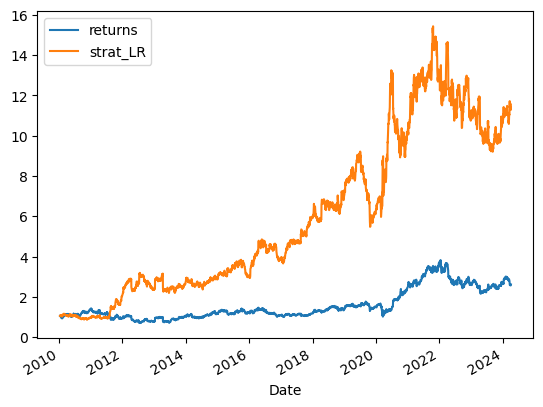

In [65]:
np.exp(df[['returns','strat_LR']].cumsum()).plot()

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
train,test=train_test_split(df, shuffle=False,test_size=0.3, random_state=0)

In [68]:
train = train.copy()

In [69]:
test=test.copy()

In [70]:
model=LinearRegression()

In [71]:
train

,Open,High,Low,Close,Adj Close,Volume,returns,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,prediction_LR,direction_LR,strat_LR
Date,,,,,,,,,,,,,,,
2010-01-12,7.21875,7.33000,7.16875,7.20625,5.210396,34623200,0.050153,0.005303,0.002570,-0.030950,-0.015386,0.003868,0.000551,1,0.050153
2010-01-13,7.32125,7.39125,7.24250,7.32000,5.292642,14494400,0.015662,0.050153,0.005303,0.002570,-0.030950,-0.015386,-0.001709,-1,-0.015662
2010-01-14,7.30500,7.37250,7.29750,7.34375,5.309813,10765600,0.003239,0.015662,0.050153,0.005303,0.002570,-0.030950,0.001276,1,0.003239
2010-01-15,7.32125,7.34375,7.18875,7.24250,5.236605,14042400,-0.013883,0.003239,0.015662,0.050153,0.005303,0.002570,-0.000435,-1,0.013883
2010-01-19,7.23750,7.32875,7.23000,7.31500,5.289025,8059200,0.009961,-0.013883,0.003239,0.015662,0.050153,0.005303,0.001147,1,0.009961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-18,10.34000,10.37000,10.29000,10.33000,9.421320,10213900,0.003880,0.015671,0.004948,0.004973,-0.003980,0.002984,-0.000353,-1,-0.003880
2019-12-19,10.29000,10.30000,10.16000,10.27000,9.366599,7302800,-0.005825,0.003880,0.015671,0.004948,0.004973,-0.003980,0.000551,1,-0.005825
2019-12-20,10.25000,10.33000,10.24000,10.29000,9.384839,6327100,0.001945,-0.005825,0.003880,0.015671,0.004948,0.004973,0.000275,1,0.001945


In [72]:
test

,Open,High,Low,Close,Adj Close,Volume,returns,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,prediction_LR,direction_LR,strat_LR
Date,,,,,,,,,,,,,,,
2019-12-26,10.250000,10.280000,10.160000,10.170000,9.275395,5815700,-0.006859,-0.004871,0.000000,0.001945,-0.005825,0.003880,0.000293,1,-0.006859
2019-12-27,10.250000,10.340000,10.240000,10.260000,9.357477,8082900,0.008811,-0.006859,-0.004871,0.000000,0.001945,-0.005825,0.000484,1,0.008811
2019-12-30,10.260000,10.270000,10.120000,10.160000,9.266273,6427000,-0.009794,0.008811,-0.006859,-0.004871,0.000000,0.001945,-0.000144,-1,0.009794
2019-12-31,10.160000,10.320000,10.160000,10.320000,9.412199,5474500,0.015625,-0.009794,0.008811,-0.006859,-0.004871,0.000000,0.000942,1,0.015625
2020-01-02,10.300000,10.340000,10.230000,10.290000,9.384839,5688000,-0.002911,0.015625,-0.009794,0.008811,-0.006859,-0.004871,-0.000774,-1,0.002911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-28,17.790001,17.990000,17.790001,17.930000,17.930000,7019600,0.007839,0.002251,0.006784,-0.005092,-0.027277,-0.038777,0.000528,1,0.007839
2024-04-01,17.889999,17.920000,17.500000,17.580000,17.580000,14601600,-0.019713,0.007839,0.002251,0.006784,-0.005092,-0.027277,0.000130,1,-0.019713
2024-04-02,17.430000,17.610001,17.389999,17.580000,17.580000,12687000,0.000000,-0.019713,0.007839,0.002251,0.006784,-0.005092,0.001295,1,0.000000


In [73]:
model.fit(train[lagnames],train['returns'])

LinearRegression()

In [74]:
test['prediction_LR']=model.predict(test[lagnames])

In [75]:
test['direction_LR']=[1 if i>0 else -1 for i in test.prediction_LR]

In [76]:
test['strat_LR']=test['direction_LR']*test['returns']

In [77]:
np.exp(test[['returns','strat_LR']].sum())

returns     1.746582
strat_LR    2.345194
dtype: float64

In [78]:
(test['direction_LR'].diff() !=0).value_counts()

direction_LR
True     697
False    378
Name: count, dtype: int64

<Axes: xlabel='Date'>

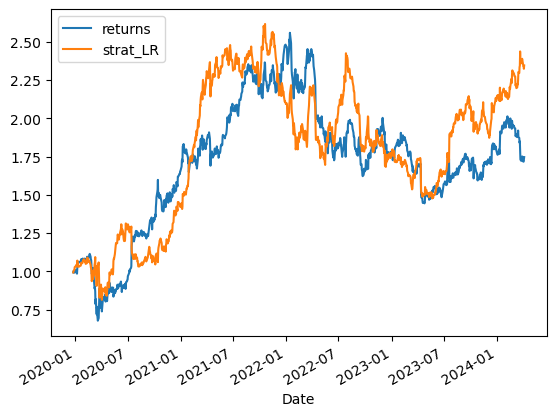

In [79]:
np.exp(test[['returns','strat_LR']].cumsum()).plot()